In [19]:
%matplotlib inline
from genshintoolkit.gtcommon.gtenum import EnumStats
from genshintoolkit.gtcommon.atfdata import mainstat_values,substat_values,substat_values_avg
from genshintoolkit.gtcommon.reaction import reaction_catalyze
import matplotlib.pyplot as plt
import numpy as np

# drawing config
plt.figure(figsize=(10,10))
plt.rcParams['figure.dpi'] = 250

# stats
normal=[
    (1.5475,1.5),
    (1.6302,1.5),
    (1.3602,1.5),
    (1.0219*2,1.5*2),
    (2.5865,1.5)
]
e2=[(2.8224,0),]
e3=[(1.0,2.5),]*3

atkp_atfset=0.14*2
em_atfset=50*1+80

baseatk_cyno=318.11
baseatk_staff=542

dmgele=0.15
cat_bonus=0.2

em_sands=mainstat_values[EnumStats.em]
dmgb=mainstat_values[EnumStats.dmg_electro]
cr_circlet=mainstat_values[EnumStats.cr]
atk_plume=mainstat_values[EnumStats.atk_static]

em_substats=substat_values_avg[EnumStats.em]
cr_substats=substat_values_avg[EnumStats.cr]
cd_substats=substat_values_avg[EnumStats.crit_dmg]

cr_staff=0.441
cd_cyno=0.384

atk_staff=lambda em:(0.52+0.28*3)*em

factor_def_res=0.45
cyno_cr=0.05+cr_staff+cr_substats*12
cyno_cd=0.5+cr_circlet*2+cd_substats*8
factor_crit=1+cyno_cd*cyno_cr



curves=[
    # (hit_tag, seq, e, agg_count)
    ('C0 - 5a1a',normal+normal[0:1],(0,0),3),
    ('C0 - 3ad4a',normal[0:3]+normal[0:4],(0,0),3),
    ('C0 - 3ae3ae',normal[0:3]+normal[0:3],e2,2.5),
    ('C1 - 5a3a',normal[0:5]+normal[0:3],(0,0),3),
    ('C1 - 4ad5a',normal[0:4]+normal[0:5],(0,0),4),
    ('C1 - 4ae4a',normal[0:4]+normal[0:4],e2,4)
]

<Figure size 720x720 with 0 Axes>

In [20]:
from genshintoolkit.gtcommon.gtenum import EnumCatalyzeReaction


def calc(atkp,em,combo) -> tuple[float]:
    _hit_tag,normal_seq,e_add,agg_count=combo
    atkp+=(atkp_atfset if e_add==(0) else 0)
    em+=em_sands + (em_atfset if e_add==(0,0) else 0 + 8*em_substats)
    atk=(baseatk_cyno+baseatk_staff)*(1+atkp)+atk_staff(em)+atk_plume
    basedmg_cat=reaction_catalyze(EnumCatalyzeReaction.aggravate,em,reaction_bonus=(0 if e_add==(0,0) else cat_bonus))
    basedmg_normal=sum([x[0]*atk+x[1]*em for x in normal_seq])+agg_count*basedmg_cat

    dmg_bonus_base=1+0.466 + (0 if e_add==(0,0) else 0.15)
    factor_def_res=0.45

    dmg_normal=basedmg_normal*dmg_bonus_base*factor_crit*factor_def_res
    dmg_e2=(e2[0][0]*atk+e2[0][1]*em+basedmg_cat)*(dmg_bonus_base+0.35)*factor_crit*factor_def_res
    dmg_e2+=(e2[0][0]*atk+e2[0][1]*em+basedmg_cat)*(dmg_bonus_base)*factor_crit*factor_def_res if e_add==e2 else 0
    dmg_e3=(e3[0][0]*atk+e3[0][1]*em+basedmg_cat)*dmg_bonus_base*factor_crit*factor_def_res

    return dmg_normal,dmg_e2,dmg_e3,atk,em


In [ ]:
# draw curves
xpoints=np.arange(0,1000,1)
ycurves=[(combo[0],np.fromiter(map(lambda x: sum(calc(0,x,combo)[0:3]),xpoints),dtype=float)) for combo in curves]

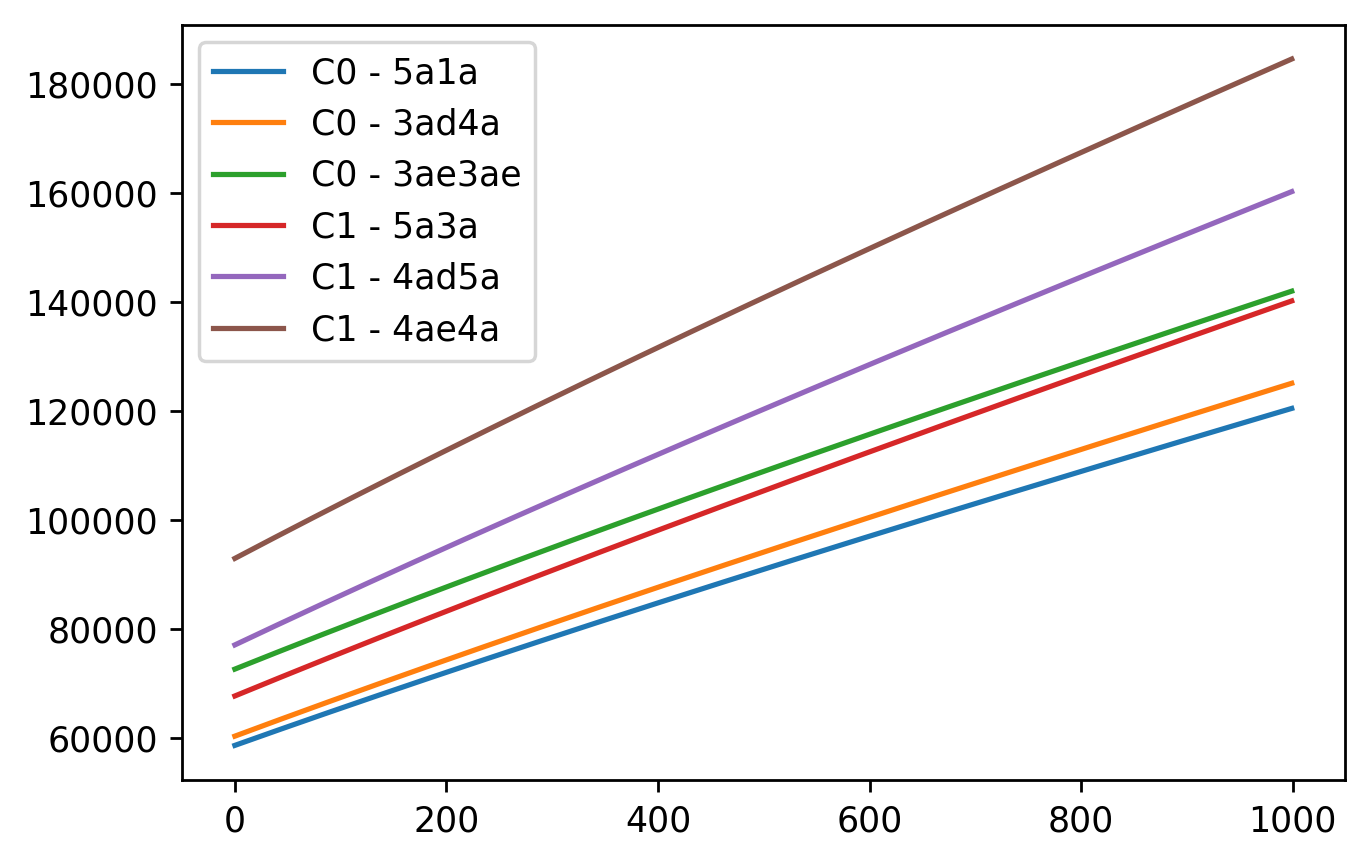

In [21]:
def draw_curve(y):
    label,ypoints=y
    plt.plot(ypoints,label=label)

for c in ycurves:
    draw_curve(c)
    
plt.legend()

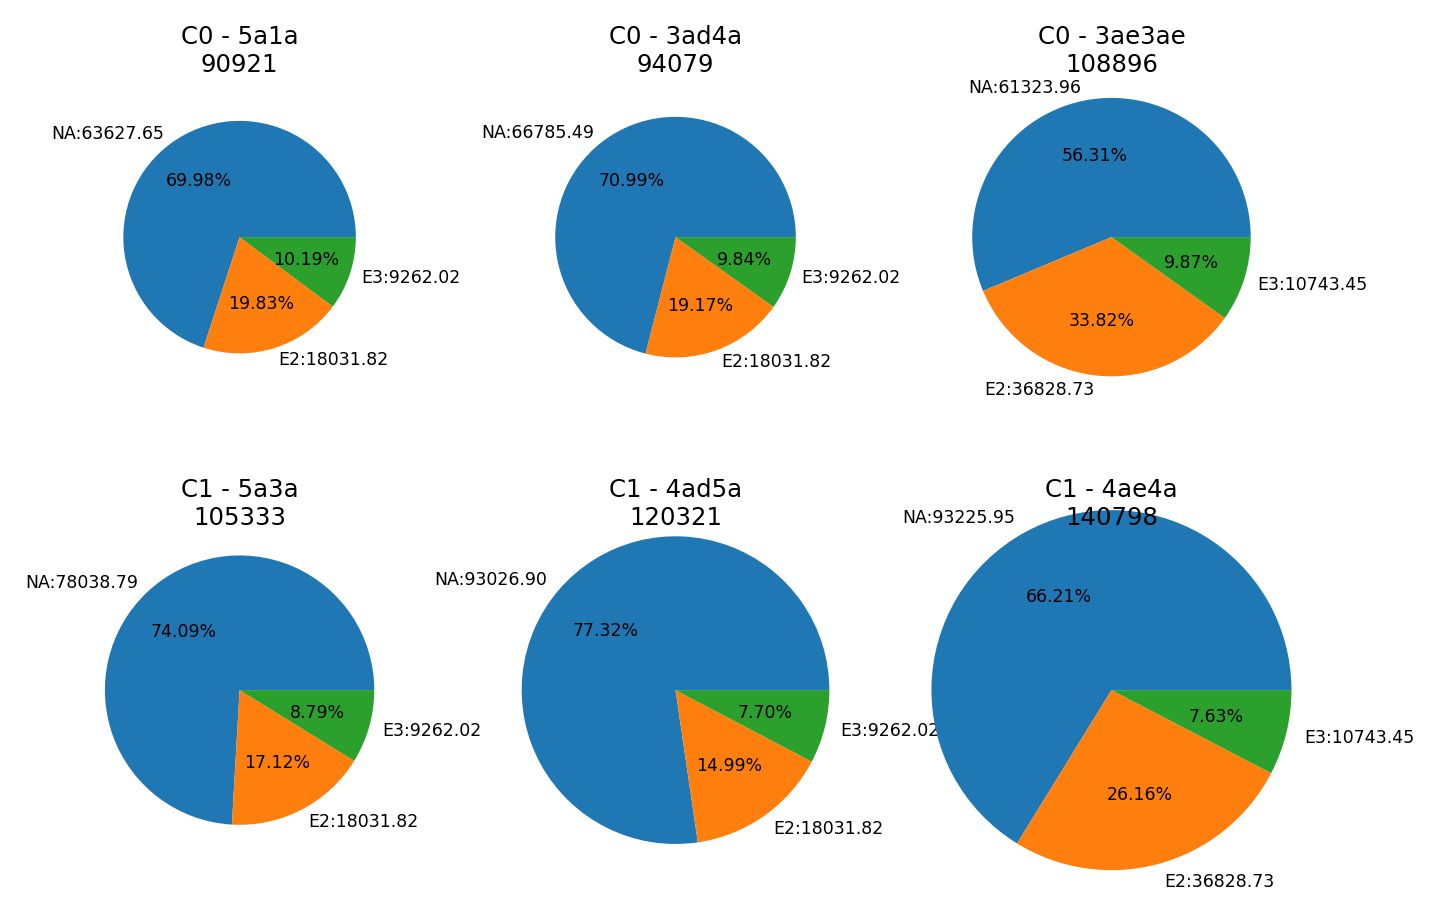

In [49]:
pie_em=500
values=[calc(0,pie_em,c)[0:3] for c in curves]
y_nps=[np.array(v) for v in values]
pie_radius=[sum(v)/sum(values[0]) for v in values]
labels=['NA','E2','E3']
font1={'color':'k','size':7}
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i,y in enumerate(y_nps):
    plt.subplot(2,3,i+1)
    plt.pie(x=y,
            labels=[f'{labels[i]}:{v:.2f}' for i,v in enumerate(y)],
            autopct='%.2f%%',
            radius=pie_radius[i],
            textprops={'fontsize':5,'color':'k'})
    title=f'{curves[i][0]}\n{sum(y):.0f}'
    plt.title(title,fontdict=font1)